# ◆Decision Tree 모델이란?

: 의사결정 규칙을 나무 구조로 나타내어 전체 자료를 몇 개의 소집단으로    
분류(classification)하거나 예측(prediction)하는 분석방법

In [2]:
from IPython.display import Image

## ◆Decision Tree를 학습한다는 뜻은??

회귀모형의 경우 ax+b의 a,b계수를 정하는 것    
KNN 모형   
svm ...   

Decision Tree : 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습하는 것

## ◆ Decision Tree로 분류하는 과정

트리를 만들 때 알고리즘은 가능한 모든 테스트에서 타깃값에 대해 가장 많은 정보를 가진 것을 고른다<br>
-> 수평으로 데이터를 나눴을 때 가장 잘 나눠지는 조건

![decision_tree1](https://tensorflowkorea.files.wordpress.com/2017/06/2-24.png?w=768)

![decision tree2](https://tensorflowkorea.files.wordpress.com/2017/06/2-25.png?w=768)

![decsiontree3](https://tensorflowkorea.files.wordpress.com/2017/06/2-26.png?w=768)

데이터 분할은 분할된 영역이 한 개의 타깃값을 가질 때까지 반복<br>
<br>
▶ 즉 counts =[숫자 , 0] 혹은 counts= [0, 숫자]('순수노드'라 부름)로 나타날 때까지 반복

##  Q. 결정 트리가 순수노드가 나올때까지 진행하면?
#### → 모델이 복잡해지고 훈련데이터에 과대적합
#### → 모든 데이터가 분류되어 있으면 데이터 중 x_train 100%라는 뜻 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
loans = pd.read_csv('./data_ml/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
# 훈련데이터
y = loans['not.fully.paid']
x = loans.drop(columns='not.fully.paid')

In [13]:
# object형 -> 숫자형
x= pd.get_dummies(x)
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,0,1,0,0


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=111)

## ◆ 해결방법

### 1. 트리 생성을 일찍 중단
### : max_depth, max_leaf_nodes, min_sample_leaf 매개변수 조정

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
print('훈련 세트 정확도 {}'.format(tree.score(x_train, y_train)))
print('테스트 세트 정확도 {}'.format(tree.score(x_test, y_test)))

훈련 세트 정확도 1.0
테스트 세트 정확도 0.7369519832985386


In [18]:
# max_depth : 트리의 최대 깊이 제한
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(max_depth =4)
tree1.fit(x_train,y_train)
print('훈련 세트 정확도 {}'.format(tree1.score(x_train, y_train)))
print('테스트 세트 정확도 {}'.format(tree1.score(x_test, y_test)))

훈련 세트 정확도 0.8386844166014096
테스트 세트 정확도 0.8512526096033403


In [24]:
# max_leaf_nodes : 리프 노드의 최대개수를 지정
from sklearn.tree import DecisionTreeClassifier
tree2 = DecisionTreeClassifier(max_leaf_nodes= 20)
tree2.fit(x_train,y_train)
print('훈련 세트 정확도 {}'.format(tree2.score(x_train, y_train)))
print('테스트 세트 정확도 {}'.format(tree2.score(x_test, y_test)))

훈련 세트 정확도 0.8403811015400678
테스트 세트 정확도 0.8465553235908142


In [23]:
# min_samples_leaf: 리프 노드가 되기 위한 최소한의 샘플 개수
from sklearn.tree import DecisionTreeClassifier
tree3 = DecisionTreeClassifier(min_samples_leaf = 5 )
tree3.fit(x_train,y_train)
print('훈련 세트 정확도 {}'.format(tree3.score(x_train, y_train)))
print('테스트 세트 정확도 {}'.format(tree3.score(x_test, y_test)))

훈련 세트 정확도 0.9060297572435395
테스트 세트 정확도 0.75


In [ ]:
## GridSearchCV() 사용

In [39]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50,100], 'max_depth':[10,20], 'min_samples_leaf':[2,5]}

tree4 = DecisionTreeClassifier()
grid = GridSearchCV(tree4, param_grid=params, refit= True, verbose= True, cv=3)
grid.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


ValueError: Invalid parameter n_estimators for estimator DecisionTreeClassifier(max_depth=15, min_samples_leaf=2). Check the list of available parameters with `estimator.get_params().keys()`.

In [27]:
# grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

#### 2. 트리를 만든 후 데이터 포인트가 적은 노드를 삭제 병합

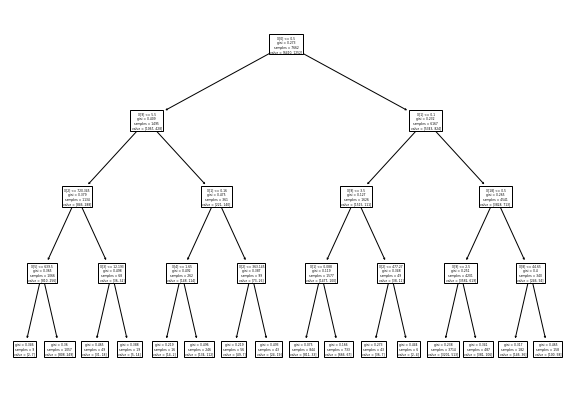

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(tree1)
plt.show()

## ◆ Decision Tree 모델의 장단점

### 1. 장점
> * 만들어진 모델을 쉽게 시각화 할 수 있어서 비전문가도 이해하기 쉬움<br>
> * 데이터 스케일에 영향을 받지 않음<br>
> * 정규화나 표준화 같은 전처리과정 필요없음

### 2. 단점
> * 사전 매개변수 조정을 사용함에도 과대적합이 되는 경향이 있어 일반화 성능이 좋지 않음<br>
> * 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없음<br>

# ♣Decision Tree 의 앙상블
### : Decision tree의 과대적합 문제를 해결하기 위해 여러가지 머신러닝 모델을 연결하여  더 강력한 모델을 만드는 기법

In [ ]:
# 앙상블: 여러가지 머신러닝 모델을 연결하여 쓰는 기법

## ◆ 랜덤 포레스트
### :  과대적합을 피하기 위해 랜덤한 데이터, 랜덤한 특징들로 여러개의 트리들의 예측 평균낸 모델

![](https://t1.daumcdn.net/cfile/tistory/9931A4505C40401D03)

## ◆랜덤포레스트 구축과정
### 1. 생성할 트리 개수 정하기(n_estimators) 
> * 크면 클수록 좋다 과대적합을 줄여줄 수 있음
> * 하지만 더 많은 메모리, 긴 훈련 시간 필요
### 2. 트리가 완전 독립으로 만들어지기 위한 부트스트랩 샘플 생성(중복추출과 비슷)
### 3. 몇 개의 특성을 고를지(max_features)
> * max_feature 값이 크면 랜덤포레스트 트리들 비슷해짐<br>
> * max_feature 값을 낮추면 각 트리들은 다르고 데이터에 맞추기 위해 깊이가 깊어짐

## ◆5개의 트리로 만든 랜덤포레스트

![](https://tensorflowkorea.files.wordpress.com/2017/06/2-33.png?w=768)

In [ ]:
#

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=111)
tree.fit(x_train,y_train)
print('훈련 세트 정확도 {}'.format(tree.score(x_train, y_train)))
print('테스트 세트 정확도 {}'.format(tree.score(x_test, y_test)))

훈련 세트 정확도 1.0
테스트 세트 정확도 0.7343423799582464


In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=111)
rfc.fit(x_train, y_train)
print('훈련 세트 정확도 {}'.format(rfc.score(x_train, y_train)))
print('테스트 세트 정확도 {}'.format(rfc.score(x_test, y_test)))

훈련 세트 정확도 0.9998694857739494
테스트 세트 정확도 0.8507306889352818


In [34]:
# 매개변수 최적화
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50,100,500], 'max_depth':[10,20,50], 'min_samples_leaf':[2,5]}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid=params, refit= True, verbose= True, cv=3)
grid.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50], 'min_samples_leaf': [2, 5],
                         'n_estimators': [50, 100, 500]},
             verbose=True)

In [35]:
grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}

In [36]:
grid.best_score_

0.8373792743409032

## ◆ Random Forest 모델의 장단점

### 1. 장점
> 성능이 매우 뛰어남<br>
> 데이터 스케일에 영향을 받지 않음<br>
> 매개변수 튜닝을 많이 하지 않아도 잘 작동

### 2. 단점
> 텍스트 데이터와 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않음<br>
> 선형모델보다 많은 메모리 사용, 훈련 예측 느림<br>


### ◆그레디언트 부스팅 회귀 트리
#### :  이전트리의 오차를 보완하는 방식으로 얕은 트리를 많이 연결하는 모델(데이터의 무작위성 없음)

###  그레디언트 모델의 매개변수

* max_depth
* n_estimators
* learning_rate

### ◆ 에이다 부스트
#### : 그레디언트 부스팅과 달리 이전의 모델이 잘못분류한 샘플에 가중치를 높여 다음 모델을 훈련

### ◆ 배깅(Boostrap aggregating)
#### : 부스트랩 데이터(중복추출)를 사용하여 분류기를 각각 다르게 학습 